In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten

In [2]:
X_train = np.load('X_train.npy')
y_train = pd.read_csv(r'y_train.csv', index_col= 0)
input_shape = X_train.shape[1:]
output_shape = y_train.shape[-1]

In [3]:
output_shape

3

In [4]:
X_train.shape

(16563, 1000, 12)

In [5]:
y_train.head()

,AFIB,OTHER,SR
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [6]:
y_train.shape[-1]

3

In [7]:
model = Sequential()
model.add(Conv1D(filters= 32, kernel_size = 3, activation = 'relu', input_shape = input_shape))
model.add(MaxPooling1D(3, 3))

model.add(Conv1D(filters= 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling1D(3, 3))

model.add(Conv1D(filters= 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling1D(3, 3))

model.add(Conv1D(filters= 128, kernel_size = 3, activation = 'relu'))
model.add(Flatten())


model.add(Dense(3, activation= 'softmax'))


In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 998, 32)           1184      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 332, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 330, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 110, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 108, 64)           12352     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 36, 64)           0

In [9]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
model_x= X_scaler.fit(X_train.reshape(-1, X_train.shape[-1]))
scaled_X = model_x.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

y_scaler = StandardScaler()
model_y= y_scaler.fit(y_train)
scaled_y = model_y.transform(y_train)


In [10]:
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['binary_accuracy', 'Precision', 'Recall'])

In [11]:
model.fit(X_train, y_train, epochs= 15)

Epoch 1/15
518/518 [==============================] - 13s 23ms/step - loss: 0.4654 - binary_accuracy: 0.8969 - precision: 0.8627 - recall: 0.8215
Epoch 2/15
518/518 [==============================] - 18s 34ms/step - loss: 0.3285 - binary_accuracy: 0.9256 - precision: 0.8989 - recall: 0.8754
Epoch 3/15
518/518 [==============================] - 11s 22ms/step - loss: 0.2927 - binary_accuracy: 0.9371 - precision: 0.9122 - recall: 0.8978
Epoch 4/15
518/518 [==============================] - 12s 24ms/step - loss: 0.2756 - binary_accuracy: 0.9407 - precision: 0.9162 - recall: 0.9047
Epoch 5/15
518/518 [==============================] - 13s 25ms/step - loss: 0.2532 - binary_accuracy: 0.9445 - precision: 0.9203 - recall: 0.9125
Epoch 6/15
518/518 [==============================] - 12s 23ms/step - loss: 0.2413 - binary_accuracy: 0.9478 - precision: 0.9248 - recall: 0.9181
Epoch 7/15
518/518 [==============================] - 12s 24ms/step - loss: 0.2237 - binary_accuracy: 0.9498 - precision: 0.

In [12]:
X_test = np.load('X_test.npy')
y_test = pd.read_csv(r'y_test.csv', index_col= 0)
y_test_arr = y_test.to_numpy()




In [13]:
X_scaler = StandardScaler()
model_x= X_scaler.fit(X_train.reshape(-1, X_train.shape[-1]))
scaled_X = model_x.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)

In [14]:
Test = X_test

In [15]:
prediction = model.predict(Test)

130/130 [==============================] - 3s 18ms/step


In [16]:
y_pred= prediction.argmax(axis= 1)

In [17]:
y_tru= y_test_arr.argmax(axis= 1)

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


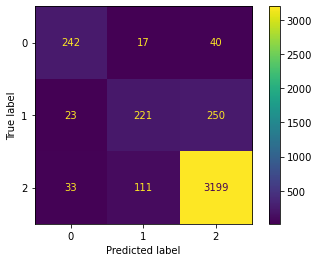

In [19]:
cm= confusion_matrix(y_true= y_tru, y_pred= y_pred)
disp= ConfusionMatrixDisplay (cm)
disp.plot()